# Introduction

This assessment aims to evaluate your understanding and application of the concepts covered in the Data Analytics course. You will be tasked with analyzing a dataset related to remote work and mental health, utilizing various data manipulation, statistical analysis, and visualization techniques learned throughout the course. This exercise will help reinforce your skills in data handling, exploratory analysis, and drawing meaningful insights from data.

### Submission Details:

The deadline for submission is 16 November at 11:59 PM. Specific submission details will be shared with you shortly.

### Passing Criteria:

To successfully pass this assessment, you must achieve a score of 80% or higher.
We encourage you to engage with the material and demonstrate your analytical skills. Good luck!


---



# Section 1 - Beginner (25%)


## Shopping Cart System with Discounts

Write a Python program to simulate a shopping cart system for an online store. The program will calculate the total cost of items, apply discounts, and check if the total exceeds a specified budget.

1.	Variables and Lists:
  - Define a `budget` variable with an initial value of 200.
  
  - Create two empty lists called `item_names_list` and `item_prices_list` to store the name and price of each item separately.

In [90]:
# Write your code here
budget = 200
item_names_list = []
item_prices_list = []

2. Functions:
  - Write a function `add_item_to_cart(item_name, item_price)` that takes the item’s name and price as arguments, appends the name to item_names and the price to item_prices, and returns both updated lists.
  
  - Write a function `calculate_total(item_prices)` that calculates and returns the total cost of all items in item_prices.

    Conditions:
    - If the total cost exceeds the budget after adding an item, print "Budget exceeded!" and stop adding more items.
    - If the total cost is within budget and exceeds $100, apply a 10% discount on the total and print the discounted total.

In [1]:
# Write your code here

# We use this function for getting prices and items
def add_item_to_cart(item_name, item_price, item_names_list, item_prices_list):
  item_names_list.append(item_name)
  item_prices_list.append(item_price)
  return item_names_list, item_prices_list

#We use this function for calculating total and discount if applicable
def calculate_total(item_names_list,item_prices, budget):
  flag=0  # I used this flag to see if the budget exceeded or not, I will use it in future to stop the program in that special case
  discount=0
  total=0
  for index, item in enumerate(item_prices):
    total += item
    if total > budget:
      print("Budget exceeded!")
      total -= item
      item_names_list.pop(index)   # I pop the item that resulted in budget exceeded error and wont show it in the final items, because I assume the customer couldnt buy it
      item_prices_list.pop(index) # I pop the price for the same reason
      flag =1 # I set the flag to 1 to identify this error happened
      return total,discount,flag
  if total > 100 and total <= budget:
    discount = total * 0.1
  return total,discount,flag


3.	Loop and Input:
  - Start the input only once the user says 'start'
  - Use a loop to allow the user to add items to the cart by entering an item name and price. The loop should stop when the user types 'done'.
  - For each item, add it to item_names and item_prices using add_item_to_cart, then update the total cost using calculate_total.

Output:
  - After the loop ends, display the final cart with each item and its price, the initial total, any applicable discount, and the final total.


In [82]:
# Write your code here

#I will write them here again just for the consistency
budget = 200
item_names_list = []
item_prices_list = []


start = input("Enter 'start' to begin: ")
while start != "start":   # It is a loop to get inputs until start is written
  start = input("Enter 'start' to begin: ")

while True:
  item_name = input("Enter item name: ")
  if item_name == "done":
    break  #Stop the program if done is written
  item_price = int(input("Enter item price: "))
  item_names_list, item_prices_list= add_item_to_cart(item_name, item_price, item_names_list, item_prices_list)
  total,discount,flag = calculate_total(item_names_list,item_prices_list,budget)
  if flag == 1:  #If flag is one meaning that the "Budget Exceeded" error happened, stop the program.
    break

for item,name in enumerate(item_names_list):
  print(name,item_prices_list[item])
print("Initial total: ",total)
print("Discount: ",discount)
print("Final total: ",total-discount)  # I also could have written the final total only, But I wasnt sure So I decided to write all 3 amount, initial total , discount and final total


# Also I should mention that since it was mentioned we should give discount only if the total is between 100 and discount, when I get the budget exceed error I wont give the discount to it
# to it. I know that we dont allow the customer to add the last item to the cart and it means that the total will be less than budget, but since the customer couldnt manage the cost
# to be less than budget we dont give discount to it :D
# If it was required to give discount to these people then I should have added the discount code to this code:
#    if total > budget:
#      print("Budget exceeded!")
#      total -= item
#      item_names_list.pop(index)   # I pop the item that resulted in budget exceeded error and wont show it in the final items, because I assume the customer couldnt buy it
#      item_prices_list.pop(index) # I pop the price for the same reason
#      flag =1 # I set the flag to 1 to identify this error happened
#      discount = total * 0.1 #This code was added
#      return total,discount,flag'''

Enter 'start' to begin: nn
Enter 'start' to begin: start
Enter item name: milk
Enter item price: 50
Enter item name: meat
Enter item price: 80
Enter item name: plastic bag
Enter item price: 10
Enter item name: done
milk 50
meat 80
plastic bag 10
Initial total:  140
Discount:  14.0
Final total:  126.0


# Section 2 - Intermidiate (55%) - Remote Work and Mental Health Analysis

Dataset source: Kaggle (https://www.kaggle.com/datasets/waqi786/remote-work-and-mental-health)




## Objective:
- In the following sections, you will explore the "Remote Work and Mental Health" dataset using Python and different data science libraries such as Pandas, NumPy and Matplotlib.
- Follow the instructions below to complete each task. Please provide code for each question and any observations as comments when necessary.

In [4]:
# Import necessary modules and libraries
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
#import numpy as np # we didnt use this library in the code, but i just wrote it since it was mentioned in the question. So i comment it.

## 1. Load Dataset (2 marks)
- Instructions: Load the dataset using Pandas and display few rows.
- Question: Describe the overall structure (rows, columns, data types) as a comment at the end of your code.


In [5]:
# Write code here
uploaded = files.upload()

Saving Impact_of_Remote_Work_on_Mental_Health.csv to Impact_of_Remote_Work_on_Mental_Health.csv


In [6]:
df = pd.read_csv('Impact_of_Remote_Work_on_Mental_Health.csv')
df.info()
df

# this dataset has 20 columns and 5000 rows. With df.info() command we can see that most of the rows are objects (which means they are text) except for Age, Years_of_Experience,
# Hours_Worked_Per_Week, Number_of_Virtual_Meetings, Work_Life_Balance_Rating, Social_Isolation_Rating and Company_Support_for_Remote_Work which are int. So in general we have
# 7 integer columns and 13 object columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        5000 non-null   object
 1   Age                                5000 non-null   int64 
 2   Gender                             5000 non-null   object
 3   Job_Role                           5000 non-null   object
 4   Industry                           5000 non-null   object
 5   Years_of_Experience                5000 non-null   int64 
 6   Work_Location                      5000 non-null   object
 7   Hours_Worked_Per_Week              5000 non-null   int64 
 8   Number_of_Virtual_Meetings         5000 non-null   int64 
 9   Work_Life_Balance_Rating           5000 non-null   int64 
 10  Stress_Level                       5000 non-null   object
 11  Mental_Health_Condition            3804 non-null   object
 12  Access

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,EMP4996,32,Male,Sales,Consulting,4,Onsite,24,2,5,High,Burnout,Yes,Decrease,4,Neutral,1,Weekly,Average,Asia
4996,EMP4997,39,Female,Sales,Healthcare,27,Onsite,48,15,1,Low,Depression,Yes,Decrease,1,Satisfied,1,NaN,Average,Africa
4997,EMP4998,42,Female,Sales,Healthcare,21,Hybrid,34,1,4,High,Burnout,No,Increase,3,Satisfied,1,Daily,Poor,Oceania
4998,EMP4999,27,Female,Sales,Healthcare,26,Remote,58,0,5,Low,NaN,Yes,Increase,3,Unsatisfied,4,Daily,Average,Asia


In [102]:
df.describe()

#From this code, we can also observe the statistical measures for each numeric column, including mean, minimum, maximum, standard deviation, and quartiles

,Age,Years_of_Experience,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Social_Isolation_Rating,Company_Support_for_Remote_Work
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,40.995000,17.810200,39.614600,7.559000,2.984200,2.993800,3.007800
std,11.296021,10.020412,11.860194,4.636121,1.410513,1.394615,1.399046
min,22.000000,1.000000,20.000000,0.000000,1.000000,1.000000,1.000000
25%,31.000000,9.000000,29.000000,4.000000,2.000000,2.000000,2.000000
50%,41.000000,18.000000,40.000000,8.000000,3.000000,3.000000,3.000000
75%,51.000000,26.000000,50.000000,12.000000,4.000000,4.000000,4.000000
max,60.000000,35.000000,60.000000,15.000000,5.000000,5.000000,5.000000


## 2. Display 'n' Rows (3 marks)
- Instructions: Display the first 13 rows of the dataset.

In [ ]:
# Write code here
df.head(13)

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America
5,EMP0006,59,Non-binary,Sales,IT,31,Hybrid,39,3,4,High,NaN,No,Increase,5,Unsatisfied,1,NaN,Average,South America
6,EMP0007,31,Prefer not to say,Sales,IT,24,Remote,51,7,3,Low,Anxiety,Yes,Decrease,5,Neutral,3,Daily,Poor,Asia
7,EMP0008,42,Non-binary,Data Scientist,Manufacturing,6,Onsite,54,7,3,Medium,Depression,No,Decrease,5,Satisfied,4,NaN,Average,North America
8,EMP0009,56,Prefer not to say,Data Scientist,Healthcare,9,Hybrid,24,4,2,High,NaN,Yes,Decrease,2,Unsatisfied,4,Daily,Poor,Europe
9,EMP0010,30,Female,HR,IT,28,Hybrid,57,6,1,Low,Depression,Yes,Decrease,2,Neutral,1,Weekly,Poor,North America


- Instructions: Display the last 7 rows of the dataset

In [ ]:
# Write code here
df.tail(7)

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
4993,EMP4994,35,Non-binary,Marketing,Retail,12,Hybrid,32,13,5,Medium,NaN,Yes,Decrease,2,Satisfied,3,Daily,Good,Asia
4994,EMP4995,40,Prefer not to say,Marketing,IT,17,Hybrid,52,1,2,Medium,Burnout,Yes,Increase,3,Neutral,5,Daily,Good,Oceania
4995,EMP4996,32,Male,Sales,Consulting,4,Onsite,24,2,5,High,Burnout,Yes,Decrease,4,Neutral,1,Weekly,Average,Asia
4996,EMP4997,39,Female,Sales,Healthcare,27,Onsite,48,15,1,Low,Depression,Yes,Decrease,1,Satisfied,1,NaN,Average,Africa
4997,EMP4998,42,Female,Sales,Healthcare,21,Hybrid,34,1,4,High,Burnout,No,Increase,3,Satisfied,1,Daily,Poor,Oceania
4998,EMP4999,27,Female,Sales,Healthcare,26,Remote,58,0,5,Low,NaN,Yes,Increase,3,Unsatisfied,4,Daily,Average,Asia
4999,EMP5000,29,Male,HR,IT,30,Onsite,20,15,1,Low,Depression,Yes,No Change,3,Unsatisfied,5,NaN,Poor,Asia


## 3. Find the Number of Null Values in the Dataset (2 mark)

In [70]:
# Write code here
print(df.isnull().sum())
# print(df.isna().sum()) we can use this code as well

#We can see that mental_health_condition column has 1196 null values and physical_activity column has 1629 null values. other columns have no null value.

Employee_ID                             0
Age                                     0
Gender                                  0
Job_Role                                0
Industry                                0
Years_of_Experience                     0
Work_Location                           0
Hours_Worked_Per_Week                   0
Number_of_Virtual_Meetings              0
Work_Life_Balance_Rating                0
Stress_Level                            0
Mental_Health_Condition              1196
Access_to_Mental_Health_Resources       0
Productivity_Change                     0
Social_Isolation_Rating                 0
Satisfaction_with_Remote_Work           0
Company_Support_for_Remote_Work         0
Physical_Activity                    1629
Sleep_Quality                           0
Region                                  0
Numeric_Stress_Level                    0
Workload_Level                          0
dtype: int64


## 4. Statistical Summary for Numeric Columns (10 marks)
Instructions: Use individual commands to find the statistical summary.

- Count

In [11]:
# Write code here

# df.describe() will also give all of those requested things all at once

#print(df.describe().loc['count'])   I could have used this code instead

df.count()

,0
Employee_ID,5000
Age,5000
Gender,5000
Job_Role,5000
Industry,5000
Years_of_Experience,5000
Work_Location,5000
Hours_Worked_Per_Week,5000
Number_of_Virtual_Meetings,5000
Work_Life_Balance_Rating,5000


- Mean

In [ ]:
# Write code here

# I only wanted the numeric columns, So I selected the numeric columns only. However, df.describe() will automatically use numeric columns instead

# df.describe().loc['mean']   # I can use this code instead

df[['Age', 'Years_of_Experience', 'Hours_Worked_Per_Week', 'Number_of_Virtual_Meetings', 'Work_Life_Balance_Rating', 'Social_Isolation_Rating','Company_Support_for_Remote_Work']].mean()

,0
Age,40.9950
Years_of_Experience,17.8102
Hours_Worked_Per_Week,39.6146
Number_of_Virtual_Meetings,7.5590
Work_Life_Balance_Rating,2.9842
Social_Isolation_Rating,2.9938
Company_Support_for_Remote_Work,3.0078


- Standard Deviation

In [12]:
# Write code here

print(df.describe().loc['std'])   # I can use both of these codes


df[['Age', 'Years_of_Experience', 'Hours_Worked_Per_Week', 'Number_of_Virtual_Meetings', 'Work_Life_Balance_Rating', 'Social_Isolation_Rating','Company_Support_for_Remote_Work']].std()

Age                                11.296021
Years_of_Experience                10.020412
Hours_Worked_Per_Week              11.860194
Number_of_Virtual_Meetings          4.636121
Work_Life_Balance_Rating            1.410513
Social_Isolation_Rating             1.394615
Company_Support_for_Remote_Work     1.399046
Name: std, dtype: float64


,0
Age,11.296021
Years_of_Experience,10.020412
Hours_Worked_Per_Week,11.860194
Number_of_Virtual_Meetings,4.636121
Work_Life_Balance_Rating,1.410513
Social_Isolation_Rating,1.394615
Company_Support_for_Remote_Work,1.399046


- Quartiles

In [16]:
# Write code here

#print(df.describe().loc['25%'])  I can use either this codes or the codes below
#print(df.describe().loc['50%'])
#print(df.describe().loc['75%'])



print("\n 0.25 quantile: \n")
print(df[['Age', 'Years_of_Experience', 'Hours_Worked_Per_Week', 'Number_of_Virtual_Meetings', 'Work_Life_Balance_Rating', 'Social_Isolation_Rating','Company_Support_for_Remote_Work']].quantile(0.25))

print("\n 0.50 quantile: \n")

print(df[['Age', 'Years_of_Experience', 'Hours_Worked_Per_Week', 'Number_of_Virtual_Meetings', 'Work_Life_Balance_Rating', 'Social_Isolation_Rating','Company_Support_for_Remote_Work']].quantile(0.50))

print("\n 0.75 quantile: \n")

print(df[['Age', 'Years_of_Experience', 'Hours_Worked_Per_Week', 'Number_of_Virtual_Meetings', 'Work_Life_Balance_Rating', 'Social_Isolation_Rating','Company_Support_for_Remote_Work']].quantile(0.75))


Age                                31.0
Years_of_Experience                 9.0
Hours_Worked_Per_Week              29.0
Number_of_Virtual_Meetings          4.0
Work_Life_Balance_Rating            2.0
Social_Isolation_Rating             2.0
Company_Support_for_Remote_Work     2.0
Name: 25%, dtype: float64
Age                                41.0
Years_of_Experience                18.0
Hours_Worked_Per_Week              40.0
Number_of_Virtual_Meetings          8.0
Work_Life_Balance_Rating            3.0
Social_Isolation_Rating             3.0
Company_Support_for_Remote_Work     3.0
Name: 50%, dtype: float64
Age                                51.0
Years_of_Experience                26.0
Hours_Worked_Per_Week              50.0
Number_of_Virtual_Meetings         12.0
Work_Life_Balance_Rating            4.0
Social_Isolation_Rating             4.0
Company_Support_for_Remote_Work     4.0
Name: 75%, dtype: float64

 0.25 quantile: 

Age                                31.0
Years_of_Experience    

## 5. Calculate Extrema (2 marks)

In [71]:
# Write code here

#print(df.describe().loc['min'])  I can use these codes instead of the code below
#print(df.describe().loc['max'])



print('Minimum amount for Numerical columns: \n')

print(df[['Age', 'Years_of_Experience', 'Hours_Worked_Per_Week', 'Number_of_Virtual_Meetings', 'Work_Life_Balance_Rating', 'Social_Isolation_Rating','Company_Support_for_Remote_Work']].min())

print('\nMaximum amount for Numerical columns: \n')

print(df[['Age', 'Years_of_Experience', 'Hours_Worked_Per_Week', 'Number_of_Virtual_Meetings', 'Work_Life_Balance_Rating', 'Social_Isolation_Rating','Company_Support_for_Remote_Work']].max())



Minimum amount for Numerical columns: 

Age                                22
Years_of_Experience                 1
Hours_Worked_Per_Week              20
Number_of_Virtual_Meetings          0
Work_Life_Balance_Rating            1
Social_Isolation_Rating             1
Company_Support_for_Remote_Work     1
dtype: int64

Maximum amount for Numerical columns: 

Age                                60
Years_of_Experience                35
Hours_Worked_Per_Week              60
Number_of_Virtual_Meetings         15
Work_Life_Balance_Rating            5
Social_Isolation_Rating             5
Company_Support_for_Remote_Work     5
dtype: int64


## 6. Find Unique Values in a Categorical Column (3 marks)

- Instructions: Identify the unique values in the `job_role` column (2 marks)
- Question: How many unique roles are represented in the dataset? (1 mark)

In [ ]:
# Write code here
df.columns
print('Unique job roles are: ' , df['Job_Role'].unique())
# we can also use df['Job_Role'].value_counts() to see the unique values and the count of each one
print('\nnumber of Unique job roles are: ' , df['Job_Role'].nunique())


Unique job roles are:  ['HR' 'Data Scientist' 'Software Engineer' 'Sales' 'Marketing' 'Designer'
 'Project Manager']

number of Unique job roles are:  7


## 7. Group Data and Calculate Mean (4 marks)
- Instructions: Group the dataset by `job_role` and calculate the mean of the `Work_Life_Balance_Rating` for each role.
- Question: Which job role has the highest average mental health index?

In [48]:
# Write code here
group = df.groupby('Job_Role')['Work_Life_Balance_Rating'].mean()
print(group)

print("The job with highest average mental health index is --",group.idxmax(),"--")  #use this code to find the highest average mental health index

#The job with highest average mental health index is Sales

Job_Role
Data Scientist       3.007184
Designer             2.966805
HR                   2.930168
Marketing            2.945827
Project Manager      2.960705
Sales                3.043656
Software Engineer    3.033755
Name: Work_Life_Balance_Rating, dtype: float64
The job with highest average mental health index is -- Sales --


## 8. Filter Data Based on Condition (4 marks)
- Instructions: Filter the dataset to show only rows where `work_hours_per_week` is greater than 40.
- Question: How many employees are working overtime?

In [74]:
# Write code here
df_filtered = df[df['Hours_Worked_Per_Week'] > 40]

print('Unique number of employees is: ', df_filtered['Employee_ID'].nunique())   # To find the number of unique Employee_ID s. Answer is 2384

df_filtered


#However it was obvious from the number of rows in df_filtered dataset

Unique number of employees is:  2384


,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,...,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region,Numeric_Stress_Level,Workload_Level
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,...,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe,2,High
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,...,No,Increase,3,Satisfied,2,Weekly,Good,Asia,2,High
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,...,No,No Change,4,Unsatisfied,5,NaN,Poor,North America,2,High
6,EMP0007,31,Prefer not to say,Sales,IT,24,Remote,51,7,3,...,Yes,Decrease,5,Neutral,3,Daily,Poor,Asia,1,High
7,EMP0008,42,Non-binary,Data Scientist,Manufacturing,6,Onsite,54,7,3,...,No,Decrease,5,Satisfied,4,NaN,Average,North America,2,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4991,EMP4992,60,Female,Data Scientist,IT,9,Hybrid,57,4,2,...,Yes,Increase,4,Satisfied,5,Weekly,Average,Oceania,1,High
4992,EMP4993,55,Prefer not to say,Project Manager,Consulting,21,Hybrid,45,7,2,...,No,No Change,2,Satisfied,3,Daily,Poor,Africa,3,High
4994,EMP4995,40,Prefer not to say,Marketing,IT,17,Hybrid,52,1,2,...,Yes,Increase,3,Neutral,5,Daily,Good,Oceania,2,High
4996,EMP4997,39,Female,Sales,Healthcare,27,Onsite,48,15,1,...,Yes,Decrease,1,Satisfied,1,NaN,Average,Africa,1,High


## 9 . Histogram of Work Hours per Week (5 marks)
- Instructions: Create a histogram of `Hours_Worked_Per_Week` (4 marks).
- Question: Describe the distribution of work hours. Are most employees working around a certain number of hours per week? (1 mark)

In [50]:
df['Hours_Worked_Per_Week']  #To observe the column

,Hours_Worked_Per_Week
0,47
1,52
2,46
3,32
4,35
...,...
4995,24
4996,48
4997,34
4998,58


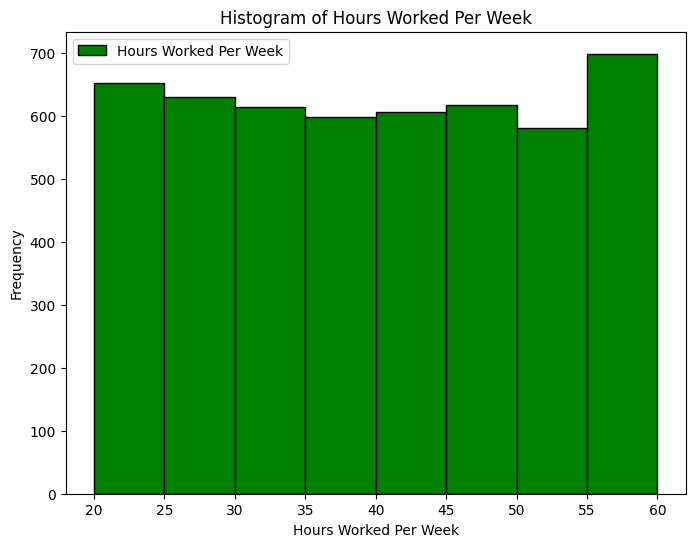

In [76]:
# Write code here
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(df['Hours_Worked_Per_Week'], bins=8, color='green' ,edgecolor='black',label='Hours Worked Per Week')
plt.xlabel('Hours Worked Per Week')
plt.ylabel('Frequency')
plt.title('Histogram of Hours Worked Per Week')
plt.legend()  # We only have one plot here, legends are mostly useful when we have more than one plot in a plot
plt.show()


# As we can see in the histogram, arround 650 + 630 + 620 + 600 people are working 40 hours or less than 40 hours. Which means 2500 people are working 40 or less than 40 hours.
# about 610 +620 + 590 + 700 people are working more than 40 and less than 60 hours. Which mean approximately 2520 people. So More than half of the people are working more than 40 hours.
# Also we can see that 55-60 hours has the highest bar, and shows that arround 700 people are working between 55 and 60 hours per week while others work less than that.
# the shortest tile is 50-55 which has only arround 600 people.
# in general most of the employees are working more than 40 hours and the most common is 55-60 hours

## 10. Scatter Plot of Work Hours vs. Mental Health Index (4 marks)
- Instructions: Create a scatter plot with `Hours_Worked_Per_Week` on the x-axis and `Years_of_Experience` on the y-axis.

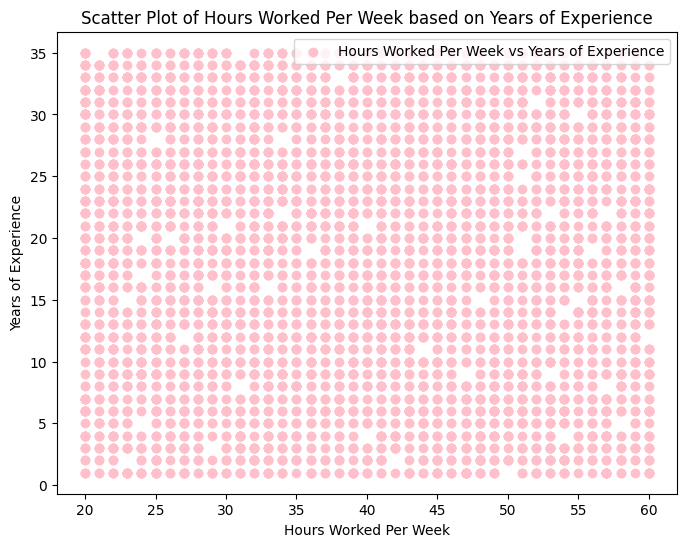

In [77]:
# Write code here
plt.figure(figsize=(8,6))
plt.scatter(df['Hours_Worked_Per_Week'],df['Years_of_Experience'], color='pink',label='Hours Worked Per Week vs Years of Experience')
plt.xlabel('Hours Worked Per Week')
plt.ylabel('Years of Experience')
plt.title('Scatter Plot of Hours Worked Per Week based on Years of Experience')
plt.legend() #again legend here is not that useful
plt.show()


## 11. Bar Chart of Average Mental Health Index by Job Role (5 marks)
- Instructions: Create a bar chart showing the average `Work_Life_Balance_Rating` for each `Job_Role` (4 marks).
- Question: Which job roles have the highest and lowest average mental health index? (1 mark)

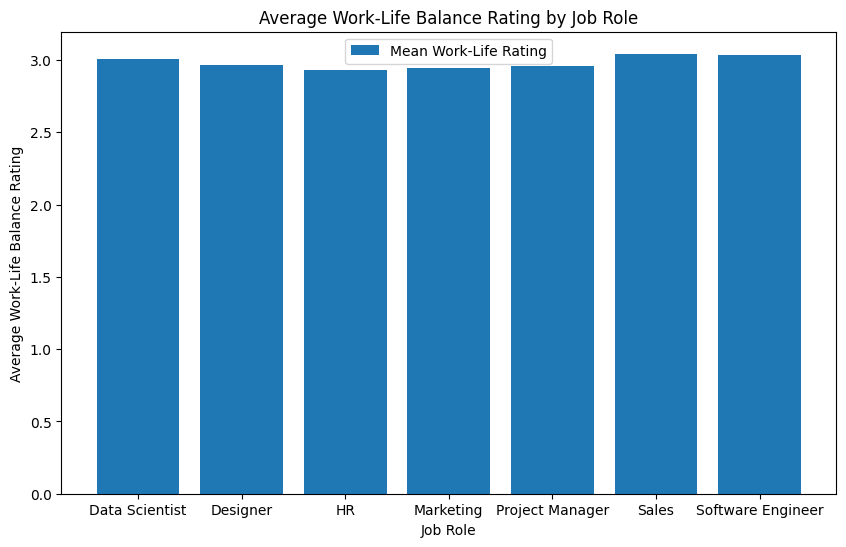

Job role with the highest average rating: Sales
Average rating for Sales is:  3.043656207366985
Job role with the lowest average rating: HR
Average rating for HR is:  2.930167597765363


In [79]:
# Write code here
group = df.groupby('Job_Role')['Work_Life_Balance_Rating'].mean()
plt.figure(figsize=(10, 6))
plt.bar(group.index, group.values, label='Mean Work-Life Rating')
plt.xlabel('Job Role')
plt.ylabel('Average Work-Life Balance Rating')
plt.title('Average Work-Life Balance Rating by Job Role')
plt.legend()
plt.show()


highest_rating_role = group.idxmax() # to find the highest average rating
lowest_rating_role = group.idxmin() # to find the lowest average rating

print(f"Job role with the highest average rating: {highest_rating_role}")
print(f"Average rating for Sales is: ", group.loc[highest_rating_role])

print(f"Job role with the lowest average rating: {lowest_rating_role}")
print(f"Average rating for HR is: ", group.loc[lowest_rating_role])


#It was also obvious from the plot. But the bars were really close to each other so I couldnt read the exact number from  the bar

## 12. Pie Chart of Workload Level Distribution (5 marks)
- Instructions: Use a pie chart to show the proportion of `Access_to_Mental_Health_Resources` (Yes and no) in the dataset (4 marks).
- Question: What percentage of employees have access to mental health resources? (1 mark)

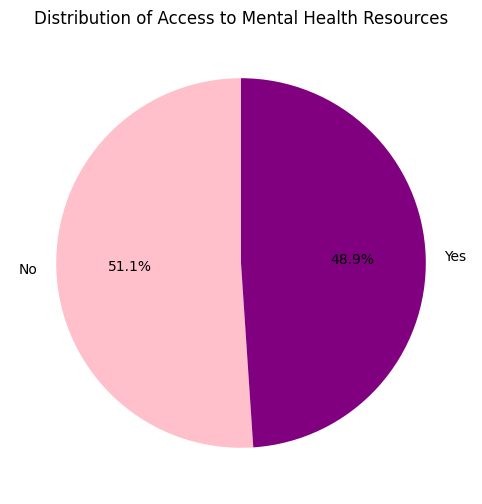

48.9% of employees have access to mental health resources


In [54]:
# Write code here

plt.figure(figsize=(8, 6))
plt.pie(df['Access_to_Mental_Health_Resources'].value_counts(),labels=df['Access_to_Mental_Health_Resources'].value_counts().index,colors=['pink','purple'],autopct='%1.1f%%',startangle=90)
plt.title('Distribution of Access to Mental Health Resources')
plt.show()

#  df['Access_to_Mental_Health_Resources'].value_counts()  # This will give the value counts to us
# df['Access_to_Mental_Health_Resources'].value_counts().index  # This will give us the labels which are yes and no
# startangle=90 # with this part we can rotate the plot so it will be more beautiful

print('48.9% of employees have access to mental health resources')

## 13. Scatter Plot of Years of Experience vs. Mental Health Index (6 marks)
- Instructions: Create a scatter plot with `age` on the x-axis and `Social_Isolation_Rating` on the y-axis (4 marks).
- Question: Do you observe any trends or relationships between age and social isolation? Is there a noticeable impact of age on isoloation? (2 marks)

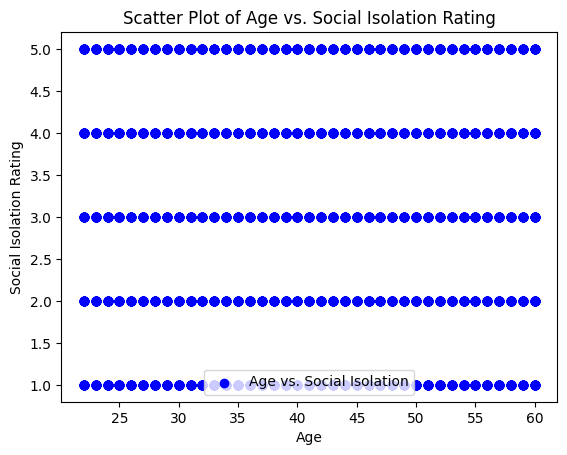

In [55]:
# Write code here
plt.scatter(df['Age'], df['Social_Isolation_Rating'],color='blue',label='Age vs. Social Isolation')
plt.xlabel('Age')
plt.ylabel('Social Isolation Rating')
plt.title('Scatter Plot of Age vs. Social Isolation Rating')
plt.legend()
plt.show()


# As I can understand there is no trend between social isolation rating and age. people of different ages have different social isolation ratings no matter of their age.
# we have a 25 year old with same level of social isolatioon rating as a 60 year old. And each age group spans the full range of Social_Isolation_Rating (1–5), suggesting that
# isolation rating is independent of age. So we can understand that this only depends on personality probably and not the age

# Section 3 - Long Answer/Advanced (20%)



## Job Role and Workload Level Impact on Mental Health

Instructions: Investigate the influence of job roles and workload level on the mental health index.
- Create a new column `workload_level` that labels each entry as "High" if the `Hours_Worked_Per_Week` is above its mean, otherwise "Low." (5 marks)
- Group the dataset by `Industry` and calculate the average `Hours_Worked_Per_Week` for each combination. (5 marks)
- Use a bar chart to display the average `Stress_Level` for each job role, with separate bars for high and low stress levels. (5 marks)
- Analyze the results: Which job roles and workload levels appear to have the greatest impact on mental health? (5 marks)


In [56]:
#Create a new column workload_level that labels each entry as "High" if the Hours_Worked_Per_Week is above its mean, otherwise "Low." (5 marks)

mean_hours = df["Hours_Worked_Per_Week"].mean()

df["Workload_Level"] = df["Hours_Worked_Per_Week"].apply(lambda x: "High" if x > mean_hours else "Low")  # We use this code to check each of the values, if it was greater than mean put High in the new column and if it was lower than mean use Low

print(mean_hours)

df[['Workload_Level','Hours_Worked_Per_Week']] #just want to show 2 columns

39.6146


,Workload_Level,Hours_Worked_Per_Week
0,High,47
1,High,52
2,High,46
3,Low,32
4,Low,35
...,...,...
4995,Low,24
4996,High,48
4997,Low,34
4998,High,58


In [57]:
#Group the dataset by Industry and calculate the average Hours_Worked_Per_Week for each combination. (5 marks)

industry_avg_hours = df.groupby("Industry")["Hours_Worked_Per_Week"].mean().reset_index() #I used reset_index() because it changes the grouped DataFrame where Industry is the index into a regular DataFrame where Industry becomes a normal column

industry_avg_hours

,Industry,Hours_Worked_Per_Week
0,Consulting,39.205882
1,Education,39.428986
2,Finance,39.192771
3,Healthcare,40.067308
4,IT,40.017426
5,Manufacturing,40.241581
6,Retail,39.150138


In [8]:
#Use a bar chart to display the average Stress_Level for each job role, with separate bars for high and low stress levels. (5 marks)
#Method 1:

stress_mapping = {"Low": 1, "Medium": 2, "High": 3} # I create a dictionary to replace the labels with a value, this way i can calculate mean
df["Numeric_Stress_Level"] = df["Stress_Level"].map(stress_mapping)  # We replace them here

avg_stress = df.groupby("Job_Role")["Numeric_Stress_Level"].mean() # we calculate average Stress_Level for each job role

stress_counts_high = df[df["Stress_Level"]=="High"].groupby(["Job_Role", "Stress_Level"]).size().unstack(fill_value=0) #I wanted to count the number of high stress levels for each job role.

stress_counts_low = df[df["Stress_Level"]=="Low"].groupby(["Job_Role", "Stress_Level"]).size().unstack(fill_value=0) #I wanted to count the number of Low stress levels for each job role.

# I used unstack(fill_value=0) because it takes the grouped data which is stacked in rows and spreads it into columns based on Stress level. If there are any missing values
# it will fill them with 0

merged2 = pd.merge(stress_counts_high,stress_counts_low,on="Job_Role") # I merged the 2 of them here only. I will use this for plotting
merged3 = pd.merge(merged2,avg_stress,on="Job_Role") # I merged 3 of them here. will use this for plotting
merged3

,High,Low,Numeric_Stress_Level
Job_Role,,,
Data Scientist,242,230,2.017241
Designer,252,259,1.990318
HR,227,241,1.980447
Marketing,225,221,2.005857
Project Manager,253,228,2.033875
Sales,253,241,2.016371
Software Engineer,234,225,2.012658


<Figure size 1200x600 with 0 Axes>

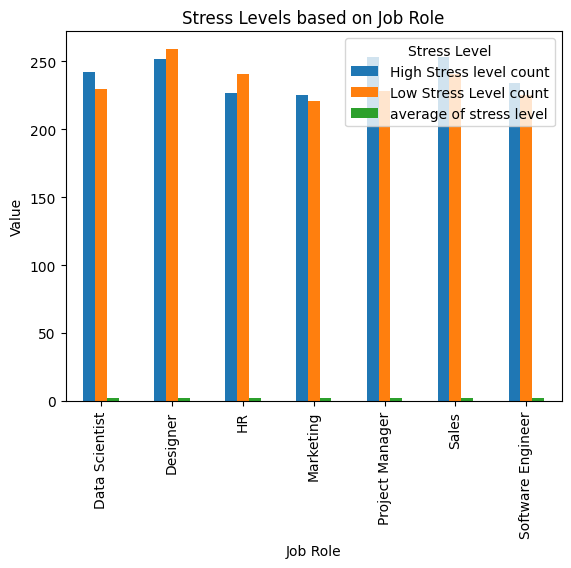

In [9]:
plt.figure(figsize=(12, 6))
merged3.plot(kind="bar")  # I used it like this because I wanted to plot 3 different values and this way is easier. If I wanted to use the normal plt.bar method I had to set a value as a distance between bars and this way is easier
plt.ylabel("Value")
plt.xlabel("Job Role")
plt.title("Stress Levels based on Job Role")
plt.legend(title="Stress Level", labels=["High Stress level count", "Low Stress Level count", "average of stress level"]) # for this kind of plots (merged3.plot) we should specify labels here
plt.show()

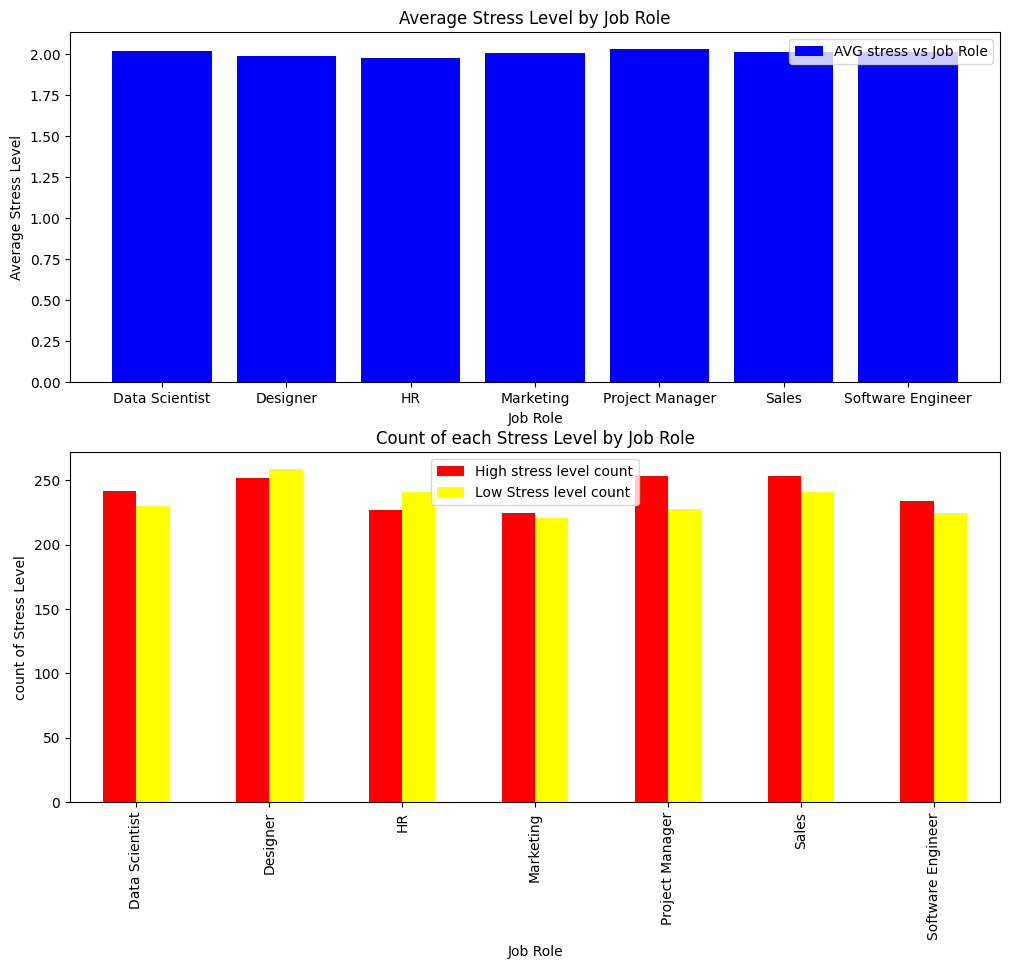

In [10]:
#Use a bar chart to display the average Stress_Level for each job role, with separate bars for high and low stress levels. (5 marks)
#Method 2:

plt.figure(figsize=(12, 10))

plt.subplot(2, 1, 1)
plt.bar(avg_stress.index,avg_stress, color="blue",label='AVG stress vs Job Role')
plt.ylabel("Average Stress Level")
plt.xlabel("Job Role")
plt.title("Average Stress Level by Job Role")
plt.legend()

plt.subplot(2, 1, 2)
merged2.plot(kind='bar', color=['red','yellow'], ax=plt.gca())
plt.ylabel("count of Stress Level")
plt.xlabel("Job Role")
plt.title("Count of each Stress Level by Job Role")
plt.legend( labels=["High stress level count","Low Stress level count"] )
plt.show()

In [61]:
avg_stress #To study the column

,Numeric_Stress_Level
Job_Role,
Data Scientist,2.017241
Designer,1.990318
HR,1.980447
Marketing,2.005857
Project Manager,2.033875
Sales,2.016371
Software Engineer,2.012658


In [64]:
#identify workload levels for each job role

mean_hours = df["Hours_Worked_Per_Week"].mean()

jobe_role_avg_hours = df.groupby("Job_Role")["Hours_Worked_Per_Week"].mean().reset_index() # The reset_index() is important because it changes the grouped DataFrame where Job_Role is the index into a regular DataFrame where Job_Role becomes a normal column
#jobe_role_avg_hours
jobe_role_avg_hours['jobRole_workload'] = jobe_role_avg_hours["Hours_Worked_Per_Week"].apply(lambda x: "High" if x > mean_hours else "Low") # again here i used lambda to change values to high and low if they are greater or lower than the avg

jobe_role_avg_hours

,Job_Role,Hours_Worked_Per_Week,jobRole_workload
0,Data Scientist,38.954023,Low
1,Designer,38.881051,Low
2,HR,39.660615,High
3,Marketing,39.734993,High
4,Project Manager,39.922764,High
5,Sales,39.860846,High
6,Software Engineer,40.271449,High


In [112]:
#Analyze the results: Which job roles and workload levels appear to have the greatest impact on mental health? (5 marks)

# In terms of the plots, I think both plots I created are important. The first one is really useful because we can compare everything all at once,
# The second plot i created is also important because the values of average of stress level for each job role significantly smaller compared to the count of each stress level,
# so i needed another plot to be able to read all the values in detail. Here I am using the second plot which has 2 subplots:

# Regarding the question, in the first subplot (Average Stress Level by Job Role), average of all the job roles are close to each other, but in general, project manager has
# the highest average (2.03) and then data scientist, sales and software engineer are equal (2.01).

# now in the second subplot (Count of each Stress Level by Job Role) we can see that sales and project manager have the highest bar for high stress level (253), meaning that more
# people are experiencing high stress level. However the difference between high and low stress levels for Sales and project manager is different. the difference between
# high and low stress for Sales is less than project manager. Which means that in sales the number of people experiencing low stress level is closer to the number of people
# experiencing high stress level and the stress level is more balanced. The same thing is also true for Data Scientist and Software engineering and these are also more balanced
# in terms of stress.

# on the other hand the differences between the bar for low stress level for project manager and the bar for high stress level for project manager is a lot and is more than
# the diference between low and high stress level for sales. which means that project manager job has more stress and the stress levels is less balanced.
# The difference between high and low stress level for project manager is: 25
# The difference between high and low stress level for Sales is: 12

# for Designer and HR we can see that people are mostly experiencing low stress level rather than high stress level. marketing also has short bars, which means it has less stress level.


# On the other hand regarding the workload we can see that sales, software engineer, project manager, marketing and HR all have high workloads, and the highest number is for
# Software engineer(40). The other jobs with high stress levels are project manager, sales, marketing and HR respectively.


# So in general I think that project manager has the most impact on mental health because it has the second highest workload and the second highest count for high stress
# level with the most amount of difference between high stress level count and low stress level count


#All together:
# Project Manager appears to have the greatest impact on mental health due to:
#     High workload (second overall).
#     High stress level (first overall).
#     Significant gap between high and low stress counts, suggesting many employees face intense pressure.
#
# Sales comes next, with the highest count of high-stress employees, though the smaller gap indicates a more balanced experience.
# Software Engineers have the highest workload, but their stress levels appear more evenly distributed, making them less affected in terms of mental health compared to Project Managers.
# Data scientists have average stress level almost same as software engineerings but since the workload is less that that, I think it comes at the forth place.
